In [1]:
import os 
from google.colab import drive
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
system_path = '/content/drive/MyDrive/GitHub/INM363-Project'
drive.mount('/content/drive')
sys.path.append(system_path)

Mounted at /content/drive


In [22]:
chkpt_root = "/content/drive/MyDrive/GitHub/INM363-Project/model_checkpoints/icm/no_reward" 
results_pth = chkpt_root + '/' + 'result.csv'
icm_df = pd.read_csv(results_pth) 

icm_df['eps_cumsum'] = icm_df['episodes_this_iter'].cumsum()
icm_df.checkpoint = icm_df['checkpoint'].astype(int)
icm_df.tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,checkpoint,eps_reward_min,eps_reward_mean,eps_reward_max,eps_len_mean,episodes_this_iter,eps_cumsum
815,815,395,NaN,816,0.0,0.0,0.0,359.65,11.0,9189.0
816,816,396,NaN,817,0.0,0.0,0.0,371.14,10.0,9199.0
817,817,397,NaN,818,0.0,0.0,0.0,375.26,11.0,9210.0
818,818,398,NaN,819,0.0,0.0,0.0,372.70,11.0,9221.0
819,819,399,NaN,820,0.0,0.0,0.0,362.08,14.0,9235.0


In [23]:

chkpt_root = "/content/drive/MyDrive/GitHub/INM363-Project/model_checkpoints/re3/no_reward" 
results_pth = chkpt_root + '/' + 'result.csv'
re3_df = pd.read_csv(results_pth) 

re3_df['eps_cumsum'] = re3_df['episodes_this_iter'].cumsum()
re3_df.checkpoint = re3_df['checkpoint'].astype(int)
re3_df.tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,checkpoint,eps_reward_min,eps_reward_mean,eps_reward_max,eps_len_mean,episodes_this_iter,eps_cumsum
815,815,395,NaN,816,0.0,0.0,0.0,344.86,11.0,9510.0
816,816,396,NaN,817,0.0,0.0,0.0,355.39,10.0,9520.0
817,817,397,NaN,818,0.0,0.0,0.0,356.24,12.0,9532.0
818,818,398,NaN,819,0.0,0.0,0.0,350.47,13.0,9545.0
819,819,399,NaN,820,0.0,0.0,0.0,351.43,11.0,9556.0


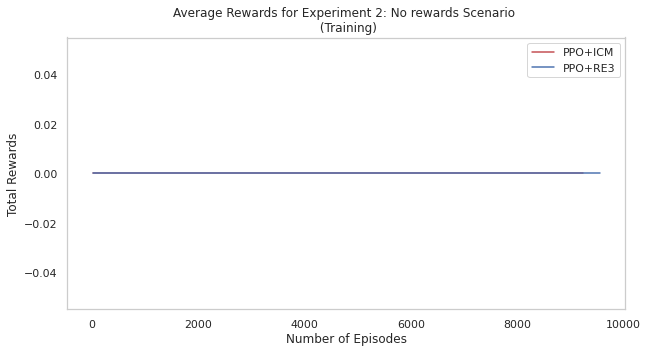

In [32]:
sns.set_style("whitegrid", {'axes.grid' : False})

#plt.plot(ppo_df['eps_cumsum'], ppo_df['eps_reward_mean'], 'k-', label='PPO')

plt.plot(icm_df['eps_cumsum'], icm_df['eps_reward_mean'], 'r-', label='PPO+ICM')

plt.plot(re3_df['eps_cumsum'], re3_df['eps_reward_mean'], 'b-', label='PPO+RE3')


plt.legend()
plt.title("Average Rewards for Experiment 2: No rewards Scenario \n (Training)") 
plt.xlabel('Number of Episodes') 
plt.ylabel('Total Rewards') 
plt.show()

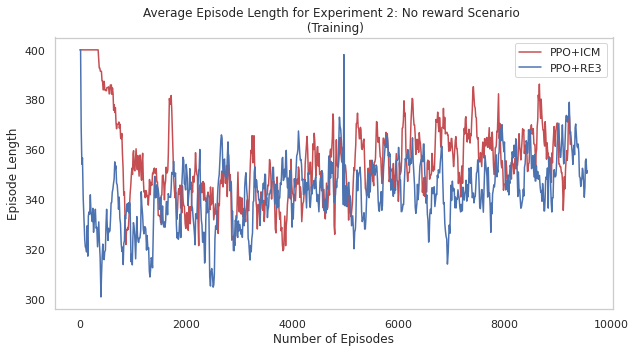

In [31]:
plt.rcParams["figure.figsize"] = (10,5)

plt.plot(icm_df['eps_cumsum'], icm_df['eps_len_mean'], 'r-', label='PPO+ICM')

plt.plot(re3_df['eps_cumsum'], re3_df['eps_len_mean'], 'b-', label='PPO+RE3')
plt.legend()
plt.title("Average Episode Length for Experiment 2: No reward Scenario \n (Training)") 
plt.xlabel('Number of Episodes') 
plt.ylabel('Episode Length') 
plt.show()